In [1]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"#"2"

In [2]:
# import estimator class
from estimators.kalmanEstimator import KalmanEstimator

# import rewarder class
from rewarders.thresholdRewarder import ThresholdRewarder

from matplotlib import pyplot
from utils.sequences_treatment import *
from utils.agent_treatment import *


Using TensorFlow backend.
/Users/antoine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/antoine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/antoine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/antoine/anaconda3/lib/python3.6/site-packag

In [3]:
# construct estimator
estimator=KalmanEstimator()
estimator.summarize()

#contruct rewarder
rewarder=ThresholdRewarder(threshold=2, cost=5000, windowSize=4)
rewarder.summarize()

No function summarize() implemented in default Estimator class.
window size: 4
threshold: 2
cost: 5000
number of measures in the window: 0


In [4]:
# generate sequences for training the agent
numberSamples=10
T=20

(objectives,measurements)=estimator.generateSequence(T,numberSamples=numberSamples)

print('shape objectives:',np.shape(objectives))
print('shape measurements:',np.shape(measurements))

shape objectives: (10, 20, 1)
shape measurements: (10, 20, 1)


In [5]:
# construct agent
agent=constructAgent(estimator,rewarder,objectives,measurements)
print('Agent constructed')

Environment parameters
  REWARDER= <rewarders.thresholdRewarder.ThresholdRewarder object at 0x10e52a780>
  inputDimensions= [(5,), (5, 1)]
Sequences parameters
  outOfRangeValue= -1
  numerSamples= 10
  n_dim_obj= 1
  n_dim_meas= 1
Instructions for updating:
Colocations handled automatically by placer.
Agent constructed


In [6]:
# Train the agent
agent.run(n_epochs=4, epoch_length=numberSamples*T)
print('Agent Trained')

/Users/antoine/Desktop/optiMeasRL-main/optimalIntermittency.py:253: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self._last_ponctual_observation)


Instructions for updating:
Use tf.cast instead.
Average (on the epoch) training loss: 1490.93017578125
Episode average V value: -39.74930191040039
Average (on the epoch) training loss: 1340.1845703125
Episode average V value: -138.3019811630249
Average (on the epoch) training loss: 1163.5777587890625
Episode average V value: -168.51759338378906
Average (on the epoch) training loss: 1037.6279296875
Episode average V value: -208.9569797515869
Average (on the epoch) training loss: 967.6288452148438
Episode average V value: -300.31189346313477
Average (on the epoch) training loss: 1096.4063720703125
Episode average V value: -1066.0976943969727
Average (on the epoch) training loss: 1166.332763671875
Episode average V value: -550.184171923995
Average (on the epoch) training loss: 1258.1009521484375
Episode average V value: -1017.1419296264648
Average (on the epoch) training loss: 1298.40576171875
Episode average V value: -1401.2418212890625
Average (on the epoch) training loss: 1334.03674316

In [7]:
# generate test data
(objectives_test,measurements_test)=estimator.generateSequence(T,numberSamples=numberSamples)

# Results of the inference on test data
(testResults_sigmas,testResults_rewards,testResults_estimates)=agentInference(agent,objectives_test,measurements_test)

Inference start
Average (on the epoch) training loss: 1155.85498046875
Episode average V value: -455.5203552246094
Average (on the epoch) training loss: 1164.1802978515625
Episode average V value: -278.77203369140625
Average (on the epoch) training loss: 1173.055908203125
Episode average V value: -377.3578186035156
Average (on the epoch) training loss: 1132.035888671875
Episode average V value: -339.0025329589844
Average (on the epoch) training loss: 1115.72119140625
Episode average V value: -287.09405517578125
Average (on the epoch) training loss: 1119.9971923828125
Episode average V value: -201.2845001220703
Average (on the epoch) training loss: 1153.92236328125
Episode average V value: -318.1994934082031
Average (on the epoch) training loss: 1147.471923828125
Episode average V value: -187.64028930664062
Average (on the epoch) training loss: 1151.2822265625
Episode average V value: -305.5784912109375
Average (on the epoch) training loss: 1145.926025390625
Episode average V value: -39

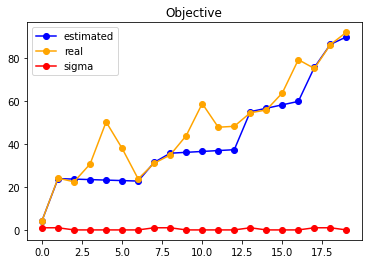

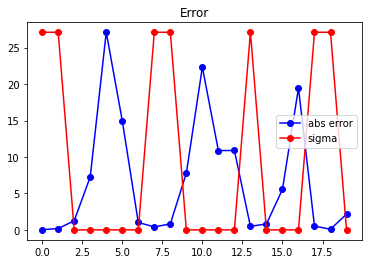

In [8]:
plotErrors(objectives_test,testResults_estimates,testResults_sigmas,idx_sample=4)